# Image processing with OpenCV
## Margin Removal
#### Import numpy, scikit-image and open computer vision libraries
* **numpy** provides the matrix arithmetic (not currently used)
* **cv2** provides the image processing functions
* **skimage** provides the embedded image display in Jupyter
* **matplotlib** is used to lay out side-by-side comparisons (not currently used)
* **copy** is needed to do deep copies of the images

In [29]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
from skimage import io
import copy

#### Configuration
* Set **DEBUG** = True to show full sized images
* **DELAY** is the duration to show the full sized images in milliseconds

In [30]:
DEBUG = False
DELAY = 2000

### Helper functions

* **makethumb()** is a quick rescaling function, reducing an image to 10% linear size
* **showbriefly()** shows an image for DELAY milliseconds or until a key is pressed
* **showimage()** is a combined embedded and popup display

In [31]:
def showimage(i):
    io.imshow(makethumb(i))
    showbriefly(i)

def makethumb(i):
    return cv.resize(i,None,fx=0.1,fy=0.1,interpolation=cv.INTER_CUBIC)

def showbriefly(i):
    if DEBUG:
        v = cv.imshow('Image',i)
        cv.waitKey(DELAY)
        cv.destroyWindow(v)

### Load the image
* Image is read as a BGR matrix

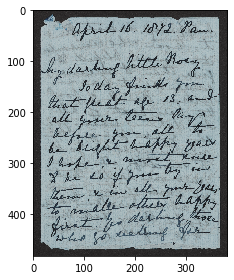

In [32]:
fname = 'uoedh_culver house letters12659'
img = cv.imread(filename='data/'+fname+'.jpg')
showimage(img)

#### Convert to grayscale

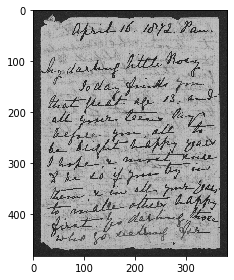

In [33]:
grey = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
showimage(grey)

### Use cv.threshold() to isolate writing
* note that **cv.threshold()** returns two arguments:
 * **ret** the threshold mask pattern (temporary variable)
 * **thresh** the image with threshold applied

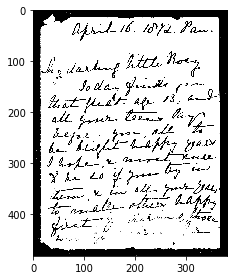

In [34]:
ret,thresh = cv.threshold(grey,64,255,cv.THRESH_BINARY)
showimage(thresh)

#### Find the Contours
* Redo the threshold with more extreme settings
* Find the contours of the objects in the image


From: https://stackoverflow.com/questions/13538748/crop-black-edges-with-opencv

In [35]:
_, cropthresh = cv.threshold(thresh,1,255,cv.THRESH_BINARY)

contours,hierarchy = cv.findContours(cropthresh,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)

#### Find contour with maximal area (largest item on page)
* Step through each of the contours[] keeping track of the contour giving the maximal value
* Store the max contour in **cont**
* *might be a better way of doing this*

In [36]:
maxc = []
maxa = 0
for c in contours:
    a = cv.contourArea(c)
    if a>maxa:
        maxc=c
        maxa=a
        print('new maximum: '+str(maxa))
cont = maxc

new maximum: 0.5
new maximum: 1.0
new maximum: 2.0
new maximum: 4.5
new maximum: 8.5
new maximum: 16.5
new maximum: 17.0
new maximum: 18.0
new maximum: 19.0
new maximum: 33.5
new maximum: 15914667.5


#### Contour results:


In [37]:
print(cont)

#print(hierarchy)

[[[378  81]]

 [[378  82]]

 [[374  86]]

 ...

 [[385  83]]

 [[383  83]]

 [[381  81]]]


#### Find the bounding rectangle of that maximal contour

In [38]:
x,y,w,h = cv.boundingRect(cont)

print('x,y,x`,y` = ',x,y,x+w,y+h)
print('w,h = ',w,h)

x,y,x`,y` =  136 81 3674 4726
w,h =  3538 4645


#### Show the bounding box in green
* Note that the **rectangle()** function modifies the image it references
* Hence the need to do a **deepcopy()**

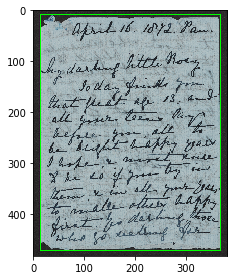

In [39]:
boundbox = copy.deepcopy(img)
cv.rectangle(boundbox,(x,y),(x+w,y+h),(0,255,0),20)
showimage(boundbox)

#### Crop the original image using numpy matrix slicing

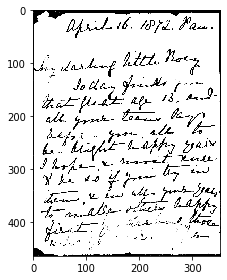

In [40]:
crop = thresh[y:y+h,x:x+w]

showimage(crop)

## Write the output image

In [41]:
print('Writing to: '+'outputs/'+fname+'-processed.jpg')
result = cv.imwrite(img=crop, filename='outputs/'+fname+'-cropped.jpg')

Writing to: outputs/uoedh_culver house letters12659-processed.jpg


#### Remove any stray image windows

In [42]:
cv.destroyAllWindows()